In [1]:
import numpy as np               
import pandas as pd              
import seaborn as sns             
from scipy import stats          
import calendar
from datetime import datetime    
import matplotlib.pyplot as plt  
%matplotlib inline               

# Load data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [5]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

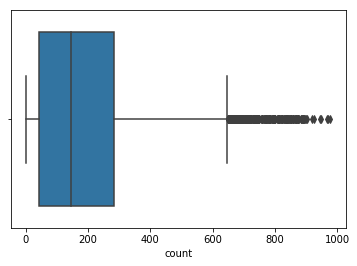

In [6]:
sns.boxplot(train['count'])

In [7]:
train_withoutliers = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness :1.0283436063589986 
Kurt : 0.42340096046253795


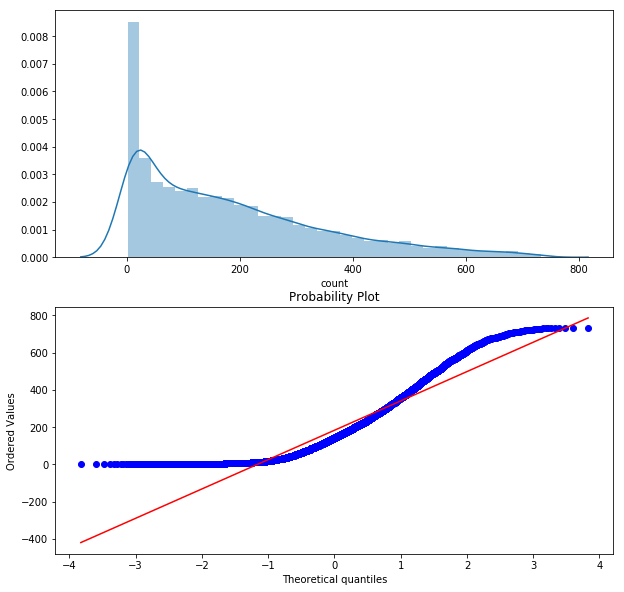

In [8]:
fig,ax=plt.subplots(2,1,figsize=(10,10)) 
sns.distplot(train_withoutliers["count"],ax=ax[0])  
stats.probplot(train_withoutliers["count"],dist="norm",fit=True,plot=ax[1])
print('Skewness :{0} '.format(train_withoutliers['count'].skew()))
print('Kurt : {0}'.format(train_withoutliers['count'].kurt()))

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.3647396459244168, 4.591363690454027, 0.9611793780126955))

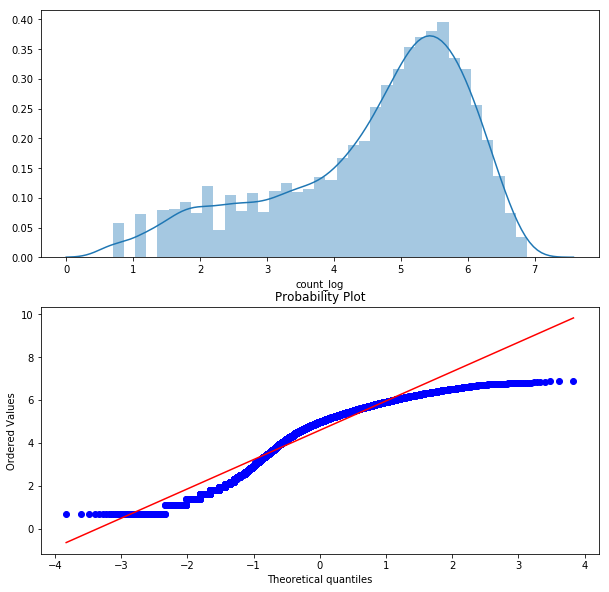

In [9]:
fig,ax=plt.subplots(2,1,figsize=(10,10))

train['count_log'] = np.log1p(train['count'])
sns.distplot(train['count_log'],ax=ax[0])
stats.probplot(train["count_log"], dist='norm', fit=True, plot=ax[1])

In [10]:
train_withoutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10739 non-null object
season        10739 non-null int64
holiday       10739 non-null int64
workingday    10739 non-null int64
weather       10739 non-null int64
temp          10739 non-null float64
atemp         10739 non-null float64
humidity      10739 non-null int64
windspeed     10739 non-null float64
casual        10739 non-null int64
registered    10739 non-null int64
count         10739 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [11]:
data = pd.concat([train_withoutliers,test],ignore_index=True)
data.shape

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(17232, 12)

# Feature Engineering

In [12]:
data['datetime'] = pd.to_datetime(data['datetime'],errors='coerce')

data['year'] = data['datetime'].apply(lambda x: x.year)
data["year"].value_counts()

2011    8645
2012    8587
Name: year, dtype: int64

In [13]:
data['hour'] = data['datetime'].apply(lambda x: x.hour).astype('int')
data['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int32

In [14]:
data['weekday'] = data['datetime'].apply(lambda x: x.weekday())

data['date'] = data['datetime'].apply(lambda x: x.date())
data[["date","weekday"]].head()

data['month'] = data['datetime'].apply(lambda x: x.month)

In [15]:
data.dtypes

atemp                float64
casual               float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
registered           float64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
year                   int64
hour                   int32
weekday                int64
date                  object
month                  int64
dtype: object

# Data Analysis

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,0,'windspeed'), Text(0.5,1,'Distribtion of windspeed')]

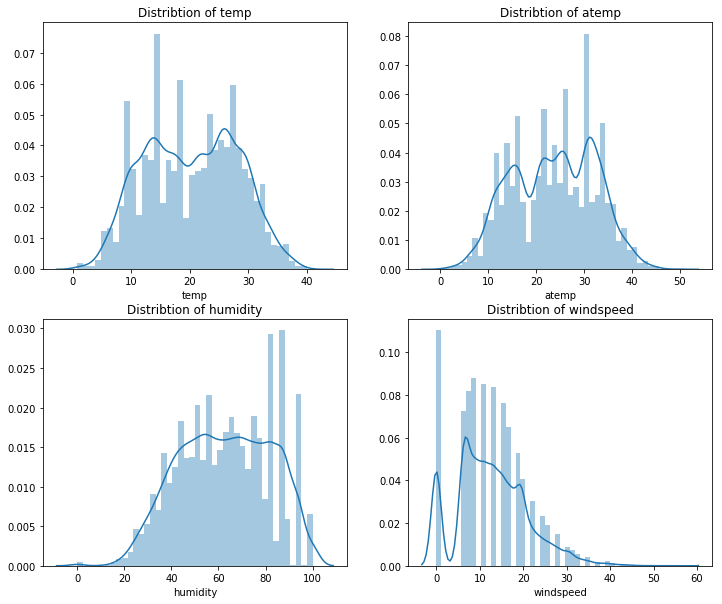

In [16]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(12,10)

sns.distplot(data['temp'],ax=axes[0,0])
sns.distplot(data['atemp'],ax=axes[0,1])
sns.distplot(data['humidity'],ax=axes[1,0])
sns.distplot(data['windspeed'],ax=axes[1,1])

axes[0,0].set(xlabel='temp',title='Distribtion of temp')
axes[0,1].set(xlabel='atemp',title='Distribtion of atemp')
axes[1,0].set(xlabel='humidity',title='Distribtion of humidity')
axes[1,1].set(xlabel='windspeed',title='Distribtion of windspeed')

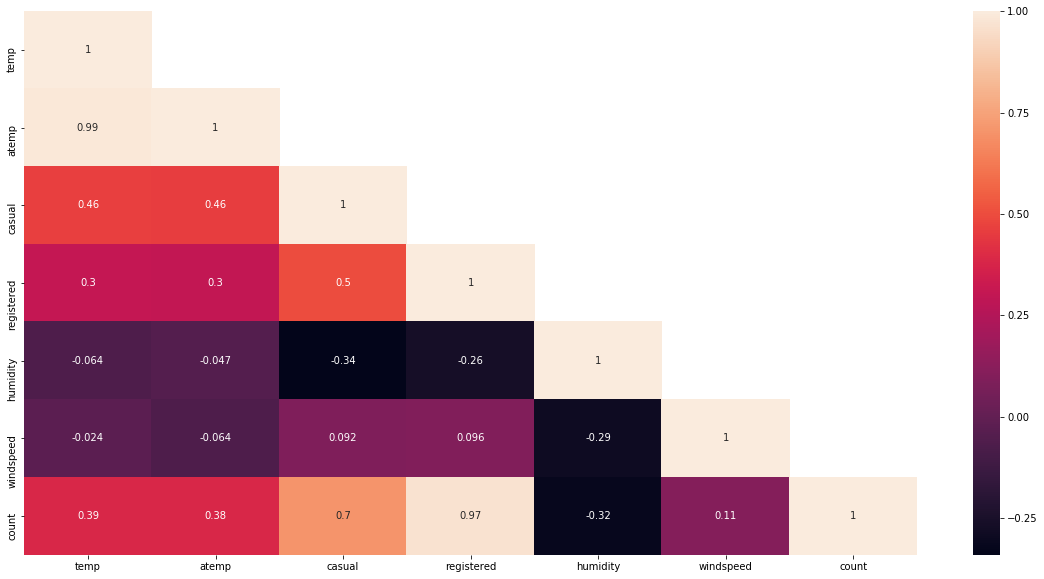

In [17]:
numeric=["temp","atemp","casual","registered","humidity","windspeed","count"]

corrmask=data[numeric].corr()
mask=np.array(corrmask)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(corrmask,mask=mask,vmax=1,annot=True)

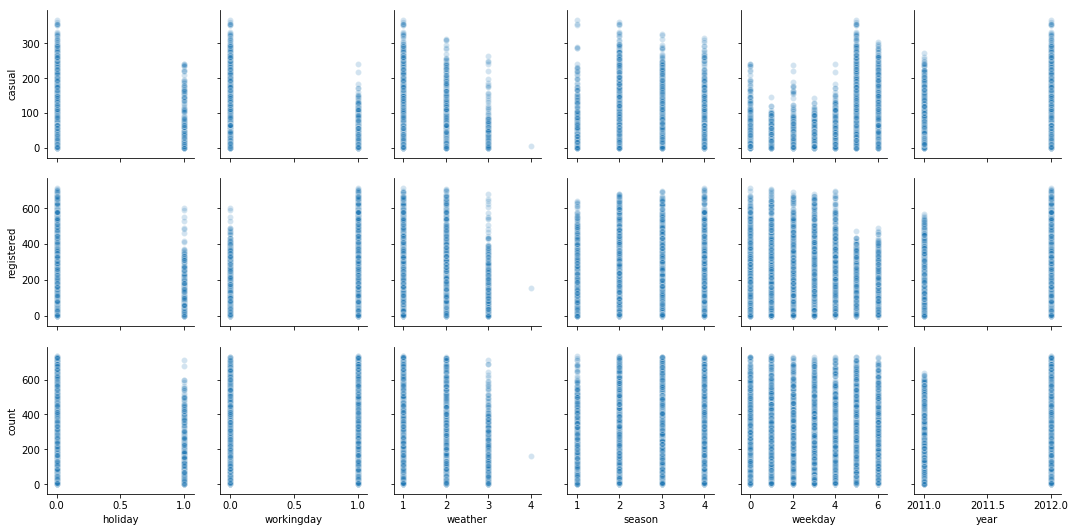

In [18]:
sns.pairplot(data,x_vars=["holiday","workingday","weather","season",
                          "weekday","year"],
                   y_vars=["casual","registered","count"], plot_kws={'alpha': 0.2})

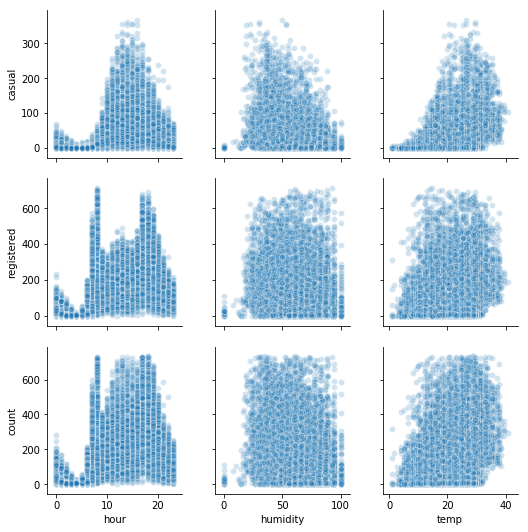

In [19]:
sns.pairplot(data,x_vars=["hour","humidity","temp"],
                   y_vars=["casual","registered","count"], plot_kws={'alpha': 0.2})


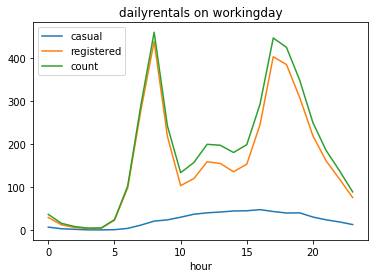

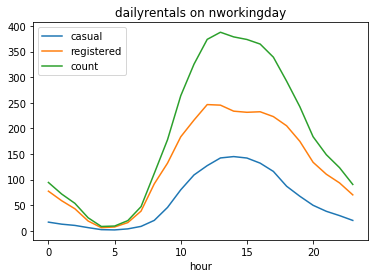

In [20]:
workingday_df=data[data['workingday']==1]
nworkingday_df=data[data['workingday']==0]


workingday_df = workingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                    'registered':'mean',
                                                                    'count':'mean'})

nworkingday_df = nworkingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                      'registered':'mean',
                                                                      'count':'mean'})

workingday_df.plot(title="dailyrentals on workingday")    #pandas中的绘图函数

nworkingday_df.plot(title="dailyrentals on nworkingday") 

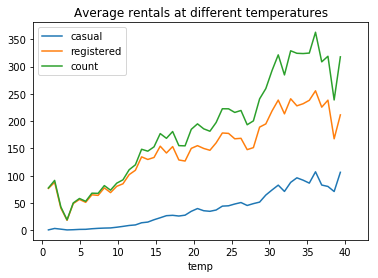

In [21]:
temp_rentals=data.groupby(["temp"],as_index=True).agg({"casual":"mean","registered":"mean","count":"mean"})
temp_rentals.plot(title="Average rentals at different temperatures")

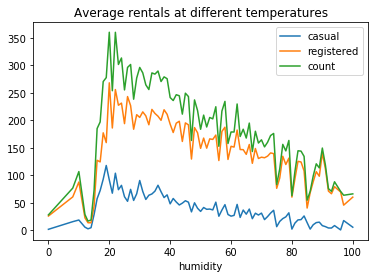

In [22]:
humidity_rentals=data.groupby(["humidity"],as_index=True).agg({"casual":"mean","registered":"mean","count":"mean"})
humidity_rentals.plot(title="Average rentals at different humidity")

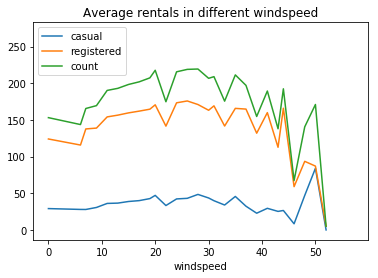

In [23]:
windspeed_rentals=data.groupby(["windspeed"],as_index=True).agg({"casual":"mean",
                                                                "registered":"mean",
                                                                "count":"mean"})
windspeed_rentals.plot(title="Average rentals in different windspeed")

In [24]:
df1=data[data['windspeed']>40]
df2=df1[df1["count"]>170]
df2

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,year,hour,weekday,date,month
752,22.725,25.0,243.0,2011-02-14 17:00:00,0,33,218.0,1,18.86,1,40.9973,1,2011,17,0,2011-02-14,2
753,20.455,11.0,205.0,2011-02-14 18:00:00,0,40,194.0,1,16.40,1,40.9973,1,2011,18,0,2011-02-14,2
867,22.725,102.0,196.0,2011-02-19 14:00:00,0,15,94.0,1,18.86,1,43.9989,0,2011,14,5,2011-02-19,2
868,21.970,84.0,171.0,2011-02-19 15:00:00,0,16,87.0,1,18.04,1,50.0021,0,2011,15,5,2011-02-19,2
1412,32.575,83.0,366.0,2011-04-04 17:00:00,0,23,283.0,2,30.34,1,40.9973,1,2011,17,0,2011-04-04,4
1839,32.575,50.0,194.0,2011-05-03 13:00:00,0,58,144.0,2,28.70,2,40.9973,1,2011,13,1,2011-05-03,5
2755,37.120,181.0,358.0,2011-07-03 17:00:00,0,49,177.0,3,32.80,3,56.9969,0,2011,17,6,2011-07-03,7
2756,37.120,74.0,181.0,2011-07-03 18:00:00,0,49,107.0,3,32.80,3,56.9969,0,2011,18,6,2011-07-03,7
3307,35.605,63.0,194.0,2011-08-07 17:00:00,0,74,131.0,3,30.34,3,43.0006,0,2011,17,6,2011-08-07,8
3953,23.485,22.0,244.0,2011-09-15 18:00:00,0,67,222.0,3,19.68,3,40.9973,1,2011,18,3,2011-09-15,9


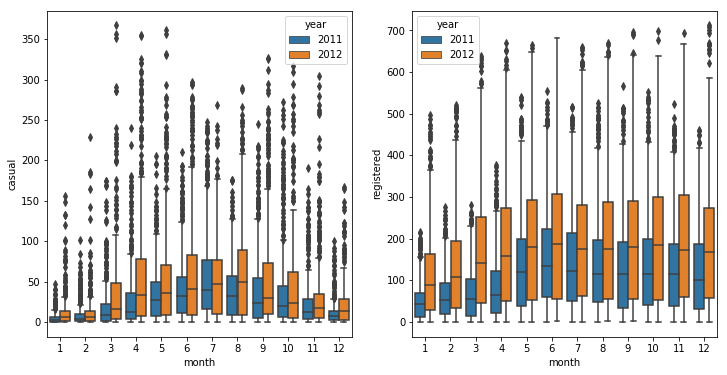

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=data[data["count"].notnull()],x="month",hue="year",y="casual")
plt.subplot(122)
sns.boxplot(data=data[data["count"].notnull()],x="month",hue="year",y="registered")
plt.show()

In [26]:
data[data['count'].notnull()].groupby(['season','year'])[['casual','registered']].sum()

casual  registered
season year                     
1      2011  13694.0     81437.0
       2012  27451.0    186838.0
2      2011  47694.0    172312.0
       2012  77974.0    259084.0
3      2011  62036.0    193212.0
       2012  73873.0    254423.0
4      2011  32393.0    179201.0
       2012  43113.0    260543.0

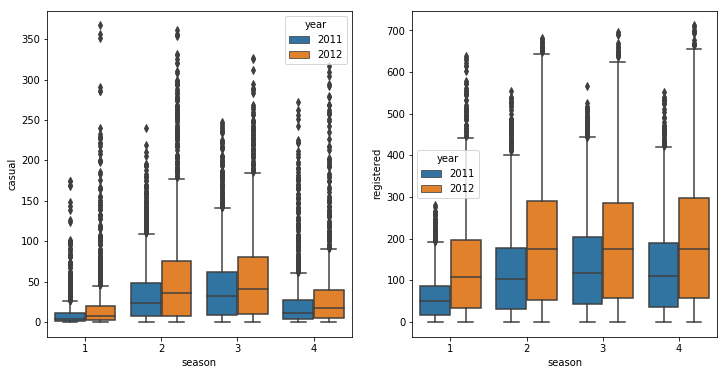

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=data[data['count'].notnull()],x='season',hue='year',y='casual')
plt.subplot(122)
sns.boxplot(data=data[data['count'].notnull()],x='season',hue='year',y='registered')
plt.show()

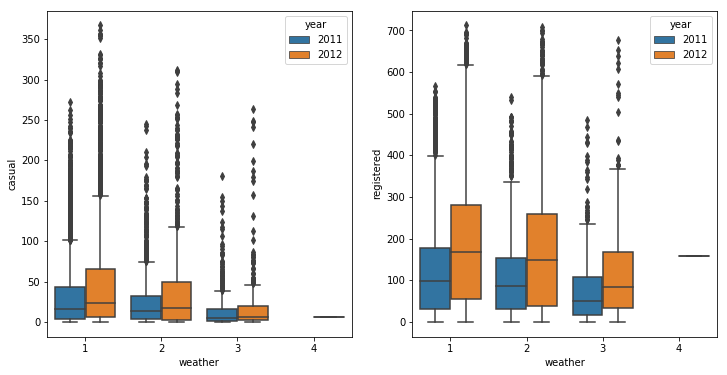

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(data=data[data['count'].notnull()],x='weather',hue='year',y='casual')
plt.subplot(122)
sns.boxplot(data=data[data['count'].notnull()],x='weather',hue='year',y='registered')
plt.show()

In [29]:
dummies_month = pd.get_dummies(data['month'], prefix= 'month')
dummies_season = pd.get_dummies(data['season'], prefix= 'season')
dummies_weather = pd.get_dummies(data['weather'], prefix= 'weather')
dummies_year = pd.get_dummies(data['year'], prefix= 'year')

In [30]:
data=pd.concat([data,dummies_month,dummies_season,dummies_weather,dummies_year],axis=1)
data.shape

(17232, 39)

In [31]:
dataTrain = data[pd.notnull(data['count'])]
dataTest= data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels=dataTrain['count']
yLabels_log=np.log(yLabels)
dataTrain.shape

(10739, 39)

In [32]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 10738
Data columns (total 39 columns):
atemp         10739 non-null float64
casual        10739 non-null float64
count         10739 non-null float64
datetime      10739 non-null datetime64[ns]
holiday       10739 non-null int64
humidity      10739 non-null int64
registered    10739 non-null float64
season        10739 non-null int64
temp          10739 non-null float64
weather       10739 non-null int64
windspeed     10739 non-null float64
workingday    10739 non-null int64
year          10739 non-null int64
hour          10739 non-null int32
weekday       10739 non-null int64
date          10739 non-null object
month         10739 non-null int64
month_1       10739 non-null uint8
month_2       10739 non-null uint8
month_3       10739 non-null uint8
month_4       10739 non-null uint8
month_5       10739 non-null uint8
month_6       10739 non-null uint8
month_7       10739 non-null uint8
month_8       10739 non-null 

In [33]:
dataTest.shape

(6493, 39)

In [35]:
dropFeatures = ['casual' , 'count' , 'datetime' , 'registered' , 'date' ,
               'windspeed' , 'atemp' ,'season','weather','month','year']

dataTrain = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

dataTrain.shape

dataTest.shape

(6493, 28)

# Training model

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
import statsmodels.api as sm

In [38]:
def Backward_selection(y, x):
    R_square_adj = []
    while True:
        res = sm.OLS(y, x).fit()
        maxp = max(res.pvalues)
        if maxp < 0.05:
            break
        x = x.drop(res.pvalues.idxmax(),1)
    return res

In [39]:
res1 = Backward_selection(yLabels_log, dataTrain)
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     598.3
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        09:42:10   Log-Likelihood:                -15848.
No. Observations:               10739   AIC:                         3.173e+04
Df Residuals:                   10721   BIC:                         3.186e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
humidity      -0.0143      0.001    -21.793      0.000      -0.016      -0.013
temp           0.0692      0.003     23.810      0.000       0.063       0.075
hour           0.1002      0.002     62.780      0.000       0.097       0.103
weekday        0.0336      0.005      6.564      0.000       0.024       0.044
month_1        0.1888      0.031      6.075      0.000       0.128       0.250
month_2        0.2700      0.030      9.052      0.000       0.212       0.328
month_3        0.1949      0.032      6.175      0.000       0.133       0.257
month_4        0.2076      0.030      6.923      0.000       0.149       0.266
month_5        0.4086      0.032     12.827      0.000       0.346       0.471
month_6        0.0996      0.036      2.753      0.006       0.029       0.170
month_9        0.3656      0.046      8.010      0.000       0.276       0.455
month_10       0.2187      0.035      6.331      0.000       0.151       0.286
month_11       0.3788      0.030     12.724      0.000       0.320       0.437
month_12       0.4498      0.031     14.658      0.000       0.390       0.510
season_1       0.6537      0.023     28.407      0.000       0.609       0.699
season_2       0.7158      0.033     21.407      0.000       0.650       0.781
season_3       0.6138      0.063      9.749      0.000       0.490       0.737
season_4       1.0473      0.028     37.745      0.000       0.993       1.102
weather_1      0.2442      0.042      5.880      0.000       0.163       0.326
weather_2      0.3841      0.042      9.086      0.000       0.301       0.467
year_2011      1.3211      0.062     21.322      0.000       1.200       1.443
year_2012      1.7094      0.063     27.184      0.000       1.586       1.833
==============================================================================
Omnibus:                      256.399   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.969
Skew:                          -0.365   Prob(JB):                     1.61e-61
Kurtosis:                       3.304   Cond. No.                     1.64e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
list_pvalues = []
for i in range(27):
    res = sm.OLS(yLabels_log, pd.concat([dataTrain.iloc[:,0],dataTrain.iloc[:,i+1]],1)).fit()
    list_pvalues.append(res.pvalues[1])

In [41]:
def Forward_selection(y, x, list_pvalues):
    x0 = x.iloc[:,0]
    R_square_adj = []
    for col in np.argsort(list_pvalues) :
        x1 = pd.concat([x0, x.iloc[:,col]],1)
        res = sm.OLS(y, x1).fit()
        R_square_adj.append(res.rsquared_adj)
        minp = min(res.pvalues)
        if minp > 0.05:
            break
        x0 = x1
    plt.plot(R_square_adj)
    plt.xlabel('variables')
    plt.ylabel('Adjusted R_square')
    plt.show()
    return res

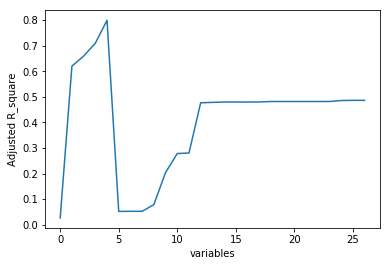

In [42]:
res2 = Forward_selection(yLabels_log,dataTrain,list_pvalues)

In [43]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     484.7
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        09:42:11   Log-Likelihood:                -15845.
No. Observations:               10739   AIC:                         3.173e+04
Df Residuals:                   10717   BIC:                         3.189e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday        0.0313      0.038      0.829      0.407      -0.043       0.105
holiday        0.0313      0.038      0.829      0.407      -0.043       0.105
weather_1      1.1096      0.157      7.068      0.000       0.802       1.417
season_4       1.6825      0.121     13.890      0.000       1.445       1.920
season_3       1.1849      0.128      9.235      0.000       0.933       1.436
season_2       1.3506      0.124     10.930      0.000       1.108       1.593
season_1       1.2891      0.119     10.863      0.000       1.057       1.522
month_12       0.6646      0.049     13.491      0.000       0.568       0.761
weather_4      2.2841      0.910      2.511      0.012       0.501       4.067
year_2011     -0.3873      0.021    -18.733      0.000      -0.428      -0.347
humidity      -0.0144      0.001    -21.839      0.000      -0.016      -0.013
temp           0.0694      0.003     23.837      0.000       0.064       0.075
workingday    -0.0060      0.037     -0.160      0.873      -0.079       0.067
hour           0.1001      0.002     62.692      0.000       0.097       0.103
month_5        0.6221      0.051     12.158      0.000       0.522       0.722
month_7        0.2260      0.053      4.252      0.000       0.122       0.330
month_4        0.4174      0.049      8.583      0.000       0.322       0.513
month_6        0.3111      0.054      5.712      0.000       0.204       0.418
month_11       0.5893      0.049     12.057      0.000       0.493       0.685
month_8        0.3207      0.053      6.094      0.000       0.218       0.424
month_10       0.4286      0.053      8.033      0.000       0.324       0.533
month_9        0.6383      0.051     12.623      0.000       0.539       0.737
month_3        0.4084      0.051      7.994      0.000       0.308       0.509
month_2        0.4843      0.049      9.842      0.000       0.388       0.581
month_1        0.3964      0.049      8.163      0.000       0.301       0.492
weather_2      1.2489      0.158      7.882      0.000       0.938       1.560
weekday        0.0336      0.009      3.931      0.000       0.017       0.050
weather_3      0.8646      0.162      5.340      0.000       0.547       1.182
==============================================================================
Omnibus:                      254.004   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.534
Skew:                          -0.362   Prob(JB):                     5.42e-61
Kurtosis:                       3.308   Cond. No.                     1.23e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-27. This might indic

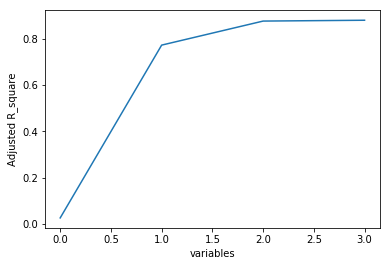

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        09:42:11   Log-Likelihood:                -20650.
No. Observations:               10739   AIC:                         4.131e+04
Df Residuals:                   10735   BIC:                         4.134e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday        0.3261      0.049      6.673      0.000       0.230       0.422
holiday        0.3261      0.049      6.673      0.000       0.230       0.422
humidity       0.0157      0.001     27.776      0.000       0.015       0.017
temp           0.1442      0.002     86.994      0.000       0.141       0.147
workingday     0.5958      0.033     17.844      0.000       0.530       0.661
==============================================================================
Omnibus:                      516.999   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.954
Skew:                          -0.577   Prob(JB):                    6.42e-130
Kurtosis:                       3.011   Cond. No.                     2.35e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
res2_pre4 = Forward_selection(yLabels_log,dataTrain,list_pvalues[:4])
res2_pre4.summary()

In [45]:
def Stepwise_selection(y, x, list_pvalues):
    x0 = x.iloc[:,0]
    for col in np.argsort(list_pvalues) :
        if list_pvalues[col] < 0.05:
            x1 = pd.concat([x0, x.iloc[:,col]],1)
            res = sm.OLS(y, x1).fit()
            indices = []
            for i,p_value in enumerate(res.pvalues):
                if p_value > 0.05:
                    indices.append(i)
            if len(indices) != 0:
                x1 = x1.drop(x1.columns.values[indices],1)
                res = sm.OLS(y, x1).fit()
            x0 = x1
    return res,x0

In [46]:
res3,x3 = Stepwise_selection(yLabels_log, dataTrain, list_pvalues)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     725.9
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        09:42:11   Log-Likelihood:                -15851.
No. Observations:               10739   AIC:                         3.173e+04
Df Residuals:                   10724   BIC:                         3.184e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weather_1      0.2379      0.041      5.743      0.000       0.157       0.319
season_4       3.2211      0.087     36.979      0.000       3.050       3.392
season_3       1.8977      0.081     23.530      0.000       1.740       2.056
season_2       2.6483      0.096     27.669      0.000       2.461       2.836
season_1       2.6250      0.079     33.028      0.000       2.469       2.781
year_2011     -0.3902      0.021    -18.908      0.000      -0.431      -0.350
humidity      -0.0145      0.001    -22.404      0.000      -0.016      -0.013
temp           0.0668      0.002     26.995      0.000       0.062       0.072
hour           0.1005      0.002     63.408      0.000       0.097       0.104
month_5        0.2556      0.044      5.846      0.000       0.170       0.341
month_7        0.4701      0.041     11.389      0.000       0.389       0.551
month_8        0.5581      0.041     13.776      0.000       0.479       0.637
month_10      -0.1794      0.047     -3.849      0.000      -0.271      -0.088
month_9        0.8696      0.038     22.815      0.000       0.795       0.944
weather_2      0.3825      0.042      9.052      0.000       0.300       0.465
weekday        0.0332      0.005      6.499      0.000       0.023       0.043
==============================================================================
Omnibus:                      254.383   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.113
Skew:                          -0.365   Prob(JB):                     6.69e-61
Kurtosis:                       3.295   Cond. No.                     9.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.93e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

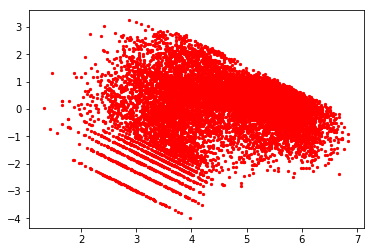

In [47]:
y_hat3 = res3.predict(x3)
e3 = yLabels_log - y_hat3
plt.scatter(y_hat3,e3,c='r',s=5)
plt.show()

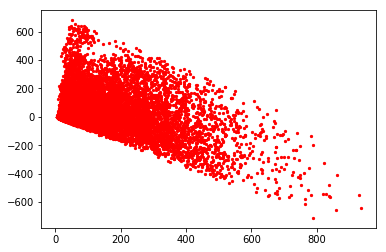

In [48]:
oe3 = np.exp(yLabels_log)-np.exp(y_hat3)
plt.scatter(np.exp(y_hat3),oe3,c='r',s=5)
plt.show()

In [60]:
rfModel = RandomForestRegressor(n_estimators=1000 , oob_score=True, random_state = 42)

rfModel.fit(dataTrain , yLabels_log.ravel())

preds = rfModel.predict( X = dataTrain)

In [61]:
rfModel.feature_importances_

array([1.64463261e-03, 2.25644126e-02, 5.73311407e-02, 3.89379966e-02,
       7.58033728e-01, 3.03400840e-02, 1.83636880e-03, 9.83968873e-04,
       1.07988954e-03, 3.17837279e-03, 1.18565043e-03, 5.07594861e-04,
       5.16477437e-04, 4.16624294e-04, 8.57245716e-04, 9.14969930e-04,
       6.57274660e-04, 8.27094446e-04, 2.82374835e-02, 1.00034281e-03,
       6.65726487e-04, 6.36743665e-03, 1.59813146e-03, 1.22040912e-03,
       9.69716260e-03, 3.36328792e-07, 1.68257588e-02, 1.25736861e-02])

In [65]:
rfModel.oob_score_

0.9505007747328209

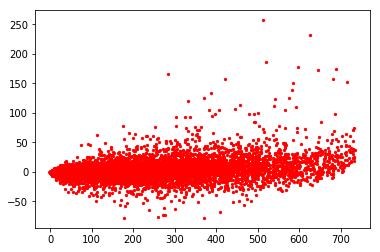

In [55]:
err = yLabels - np.exp(preds)
plt.scatter(yLabels,err,c='r',s=5)
plt.show()

In [50]:
predsTest= rfModel.predict(X = dataTest)
submission=pd.DataFrame({'datetime':datetimecol , 'count':[max(0,x) for x in np.exp(predsTest)]})
#submission.to_csv('bike_predictions.csv',index=False)

In [51]:
submission

,datetime,count
10739,2011-01-20 00:00:00,11.032283
10740,2011-01-20 01:00:00,3.816308
10741,2011-01-20 02:00:00,2.625095
10742,2011-01-20 03:00:00,3.140806
10743,2011-01-20 04:00:00,2.627128
10744,2011-01-20 05:00:00,4.914360
10745,2011-01-20 06:00:00,36.603356
10746,2011-01-20 07:00:00,90.093392
10747,2011-01-20 08:00:00,212.853633
10748,2011-01-20 09:00:00,121.559269
